# <span style="color:orange">Thompson Sampling</span>

### <span style="color:orange">Importing the Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <span style="color:orange">Importing the Dataset</span>

In [2]:
dataset = pd.read_csv('Datasets\\Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### <span style="color:orange">Implementing Thompson Sampling</span>

In [4]:
import random
# // no. of users (the number of times we run the algorithm)
N = 500
# // no. of ads
d = 10
ads_selected = []
# // Ni1
number_of_rewards_1 = [0] * d
# // Ni0
number_of_rewards_0 = [0] * d
total_reward = 0

In [5]:
for n in range(0, N):
    ad = 0
    max_of_random_draws = 0
    # // step 2
    for ad_index in range(0, d):
        random_beta_draw = random.betavariate(alpha=number_of_rewards_1[ad_index] + 1,
                                              beta=number_of_rewards_0[ad_index] + 1)
        # // step 3
        if random_beta_draw > max_of_random_draws:
            max_of_random_draws = random_beta_draw
            ad = ad_index

    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1

    total_reward = total_reward + reward

📈 Beta Distribution Shapes
Depending on the values of α and β, the Beta distribution can take on various shapes:
Uniform (flat):
α=β=1

Skewed right:
α<β

Skewed left:
α>β

Peaked (bell-shaped):
α=β>1

U-shaped:
α,β<1

In [6]:
print(ads_selected)

[8, 6, 7, 4, 9, 7, 3, 8, 0, 2, 3, 0, 2, 5, 2, 1, 2, 0, 4, 8, 8, 3, 8, 2, 9, 3, 3, 6, 1, 4, 2, 4, 4, 7, 7, 8, 5, 6, 7, 9, 8, 3, 4, 8, 4, 6, 5, 1, 7, 2, 0, 7, 6, 8, 9, 6, 3, 7, 7, 4, 8, 4, 1, 5, 7, 2, 7, 2, 7, 3, 9, 5, 3, 9, 7, 2, 8, 4, 3, 8, 2, 8, 7, 7, 9, 6, 2, 7, 4, 4, 2, 2, 2, 7, 6, 0, 7, 0, 7, 9, 3, 7, 0, 8, 3, 2, 0, 8, 6, 3, 4, 8, 7, 8, 9, 0, 1, 7, 7, 0, 4, 7, 7, 5, 5, 6, 6, 4, 2, 4, 8, 8, 2, 0, 0, 2, 8, 7, 4, 1, 0, 0, 9, 2, 4, 7, 4, 4, 4, 5, 2, 6, 4, 4, 2, 4, 4, 6, 1, 6, 8, 6, 1, 8, 4, 7, 2, 7, 3, 8, 6, 9, 4, 4, 7, 6, 3, 6, 7, 8, 8, 8, 7, 7, 7, 9, 4, 1, 3, 4, 6, 7, 5, 2, 8, 3, 1, 8, 4, 4, 4, 8, 9, 9, 4, 4, 4, 5, 7, 8, 4, 3, 7, 4, 7, 4, 3, 4, 7, 5, 4, 4, 9, 6, 8, 1, 8, 8, 0, 2, 8, 7, 2, 4, 8, 4, 3, 7, 6, 6, 8, 8, 8, 3, 6, 5, 0, 7, 4, 3, 4, 0, 8, 6, 3, 7, 8, 4, 3, 6, 3, 3, 2, 4, 3, 4, 1, 4, 4, 4, 4, 4, 6, 3, 4, 4, 8, 9, 3, 4, 1, 3, 5, 4, 4, 8, 0, 4, 7, 9, 6, 7, 2, 0, 4, 6, 1, 4, 6, 7, 4, 4, 7, 6, 4, 4, 8, 4, 4, 4, 4, 4, 6, 4, 4, 6, 5, 4, 4, 6, 4, 4, 4, 4, 3, 7, 4, 4, 4, 4, 6, 4, 4, 

### <span style="color:orange">Visualizing the Results</span>

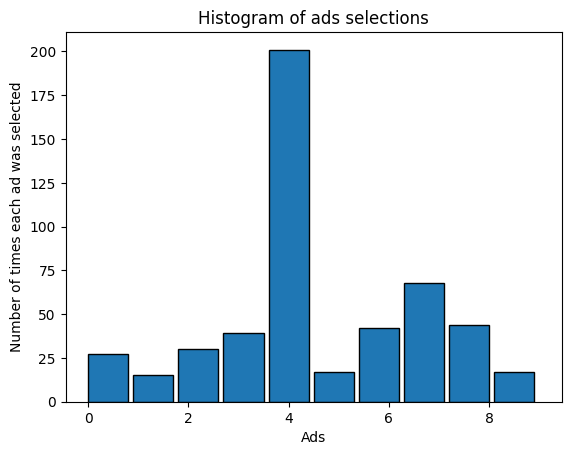

In [7]:
plt.hist(ads_selected, edgecolor='black', width=0.8)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

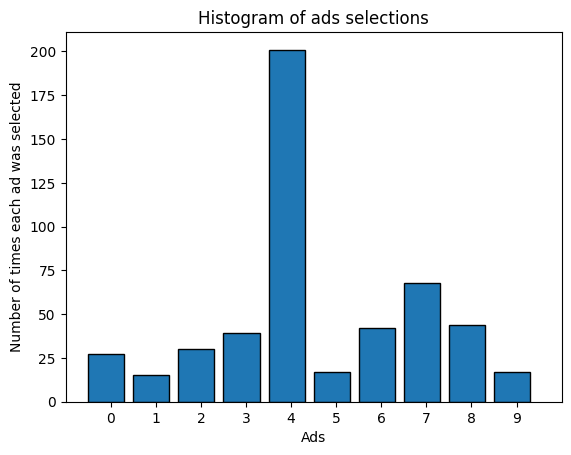

In [8]:
bins = np.arange(0, 11)
n, bins, patches = plt.hist(ads_selected, bins=bins, edgecolor='black', width=0.8)

# Set x-ticks at the center of each bar
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, [str(int(x)) for x in bin_centers])

plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

___